# Project Data wrangling " WeRateDogs - 2021" 

## Table of Content 

<li> Introduction<br>
<li> Gathering data<br>
<li> Assessing data<br>
<li> Cleaning data

# Introduction

The objective of this project is to verify three basic operations in dealing with data, which are:Gathering data , Assessing data and Cleaning data. 
This is to reach more accurate data and give realistic results and solutions that can be used. In this project, we discussed obtaining Twitter user @dog_rates, also known as WeRateDogs.

Here in this project, I used the data that Udacity presented in the project file, because of the delay of Twitter in responding to the request for data, the rooms and the goal are the same in both cases

## What is Data Wrangling?
Data wrangling is the process of cleaning, structuring and enriching raw data into a desired format for better decision making in less time. Data wrangling is increasingly ubiquitous at today’s top firms. Data has become more diverse and unstructured, demanding increased time spent culling, cleaning, and organizing data ahead of broader analysis. At the same time, with data informing just about every business decision, business users have less time to wait on technical resources for prepared data.

## What is Gathering Data ? 

Gathering Data is the process of gathering and measuring information on variables of interest, in an established systematic fashion that enables one to answer stated research questions, test hypotheses, and evaluate outcomes.

### How to Gathering Data ? 

We will collect this data
<li> Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv<br> 
<li> The tweet image predictions, i.e.This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv <br> 
<li> Twitter JSON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import datetime
import seaborn as sns
import tweepy
from PIL import Image

### 1- Twitter archive file

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter.shape

(2356, 17)

In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### 2- Tweet image prediction

In [7]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image-predictions-3.tsv', sep='\t')

image_predictions.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
image_predictions.shape

(2075, 12)

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3- Twitter JSON

In [13]:
Json = pd.read_json('tweet-json copy', lines=True)

Json.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [14]:
Json.shape

(2354, 31)

In [15]:
Json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [59]:
selected_attr = []
with open('tweet-json copy', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        # create a dictionary with the JSON data, then add to a list tweet_id, favorites, retweets from the JSON data
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count']})
# convert the tweet JSON data dictionary list to a DataFrame
Json = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets'])


In [60]:
## Test
Json.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data and Cleaning data

### What is Assessing Data ? 

Data Quality Assessment is a distinct phase within the data quality life-cycle that is used to verify the source, quantity and impact of any data items that breach pre-defined data quality rules. The Data Quality Assessment is a task typically executed by dedicated Data Quality Software

### Quality And Tidiness Issues:


#### Quality Issues:

<li> Delete cells with a lot of missing values
<li> Drop values that contain repeated information
<li> Drop duplicates in jpg_url column
<li>Remove html tags in source column
<li> The columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) have only 181 values and 2175 missing values (Null values), and retweeted_status_timestamp Column has invalid format.
<li>Create a backup to preserve the original files    
<li>The Column timestamp has invalid format, it should be a datetime type.
<li> The Column tweet_id Change from an integer to string . 

#### Tidiness Issues:

<li>Combine  “'doggo', 'floofer', 'pupper', ‘puppo' ”columns into a single column called “ Dog_Stage “ 
<li>Information about one type of observational unit (tweets) is spread across three different files/dataframes. 
<li> Drop columns with missing values: 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
’retweeted_status_user_id’,‘retweeted_status_timestamp','expanded_urls
<li>The file has 2354 rows, the same of tweeter archive file, no issu Merge the columns (p1, p1_dog, p2, p2_dog, p3, p3_dog) in one column called: image prediction , and Merge the columns(p1_conf, p2_conf, p3_conf) in one column called confidence level.   
<li>Merge all three dataset and remove repetitive columns.
Take both the twitter_clean and Json_clean tables and image_clean merge into one table using the join() method on the columns tweet_id.

### What is Cleaning data ? 


Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled

#### 1- Twitter archive file | twitter-archive-enhanced-2.csv


In [16]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
twitter.duplicated().sum()

0

In [19]:
sum(twitter['tweet_id'].duplicated())

0

In [26]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### 2-The tweet image predictions, i.e.This file (image_predictions.tsv)

In [20]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [21]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
image_predictions.duplicated().sum()

0

In [24]:
sum(image_predictions.jpg_url.duplicated())

66

In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
print(image_predictions.p1_dog.value_counts())
print(image_predictions.p2_dog.value_counts())
print(image_predictions.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


#### 3- Twitter JSON


In [62]:
Json.isnull().sum()

tweet_id     0
favorites    0
retweets     0
dtype: int64

### Cleaning Data 



In [111]:
# Making a copy of all  dataframes before data cleaning keep orginals data 

twitter_clean = twitter.copy()
image_clean = image_predictions.copy()
Json_clean = Json.copy()

#### Define 

Change format for timestamp and tweet_id column:
The Column tweet_id change from an integer to string and timestamp has invalid format, it should be a datetime type.

#### Code 

In [94]:

twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
Json_clean['tweet_id'] = Json_clean['tweet_id'].astype(str)

#### Test 

In [95]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [96]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [97]:
Json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2354 non-null   object
 1   favorites  2354 non-null   int64 
 2   retweets   2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define 

Remove html tags in source column

#### Code 

In [105]:
twitter_clean.source = twitter_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
twitter_clean.source = twitter_clean.source.astype('category')

<ipython-input-105-ea97778a6e9d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_clean.source = twitter_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test 

In [106]:
twitter_clean['source'].head(5)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: category
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

#### Define 

Remove duplicates of tweets in the row

#### Code 

In [107]:
twitter_clean.dropna(subset = ["rating_numerator"], inplace=True)

In [108]:
twitter_clean.dropna(subset = ["retweeted_status_id"], inplace=True)

#### Test 

In [109]:
print (twitter_clean)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                    NaN                  NaN   
32    886054160059072513                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
73    878404777348136964                    NaN                  NaN   
...                  ...                    ...                  ...   
1023  746521445350707200                    NaN                  NaN   
1043  743835915802583040                    NaN                  NaN   
1242  711998809858043904                    NaN                  NaN   
2259  667550904950915073                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   

                      timestamp              source  \
19    2017-07-21 01:02:36 +0000  Twitter for iPhone   
32    2017-07-15 02:45:48

#### Define 

Drop columns with missing values:
         'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'

#### Code

In [82]:
### Delete columns no needed
twitter_clean = twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], 1)

#### Test 

In [35]:
list(twitter_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define 

Combine “'doggo', 'floofer', 'pupper', ‘puppo' ”columns into a single column called “ Dog_Stage “

#### Code 

In [39]:
twitter_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [40]:
twitter_clean['doggo'].replace('None', '', inplace=True)
twitter_clean['floofer'].replace('None', '', inplace=True)
twitter_clean['pupper'].replace('None', '', inplace=True)
twitter_clean['puppo'].replace('None', '', inplace=True)

In [41]:
twitter_clean['Dog_Stage'] = twitter_clean['doggo'] + twitter_clean['floofer'] +twitter_clean['pupper'] + twitter_clean['puppo']

In [42]:
twitter_clean.loc[twitter_clean.Dog_Stage == '', 'Dog_Stage'] = np.nan

In [43]:
twitter_clean['Dog_Stage'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: Dog_Stage, dtype: int64

In [44]:
twitter_clean.loc[twitter_clean.Dog_Stage == 'doggopupper', 'Dog_Stage'] = 'doggo, pupper'
twitter_clean.loc[twitter_clean.Dog_Stage == 'doggofloofer', 'Dog_Stage'] = 'doggo, floofer'
twitter_clean.loc[twitter_clean.Dog_Stage == 'doggopuppo', 'Dog_Stage'] = 'doggo, puppo'

In [45]:
twitter_clean['Dog_Stage'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: Dog_Stage, dtype: int64

In [46]:
twitter_clean['Dog_Stage'].isnull().value_counts()

True     1976
False     380
Name: Dog_Stage, dtype: int64

In [47]:
twitter_clean = twitter_clean.drop(['pupper','doggo','puppo','floofer'], axis = 1)

#### Test 

In [48]:
## Test 

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   Dog_Stage           380 non-null    object
dtypes: int64(3), object(5)
memory usage: 147.4+ KB


#### 2-  image predictions, i.e.This file (image_predictions.tsv)

#### Define 

Drop duplicates in jpg_url column

In [50]:
sum(image_clean.jpg_url.duplicated())

66

#### Code 

In [51]:
image_clean.drop_duplicates('jpg_url' , inplace = True)


#### Test 

In [52]:
sum(image_clean.jpg_url.duplicated())

0

#### Define 

Merge the columns (p1, p1_dog, p2, p2_dog, p3, p3_dog) in one column called: image prediction , and merge the columns(p1_conf, p2_conf, p3_conf) in one column called confidence level.

#### Code

In [53]:
dog_type = []
confidence_level = []

def image(image_clean):
    if image_clean['p1_dog'] == True:
        dog_type.append(image_clean['p1'])
        confidence_level.append(image_clean['p1_conf'])
    elif image_clean['p2_dog'] == True:
        dog_type.append(image_clean['p2'])
        confidence_level.append(image_clean['p2_conf'])
    elif image_clean['p3_dog'] == True:
        dog_type.append(image_clean['p3'])
        confidence_level.append(image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_level.append('Error')

image_clean.apply(image, axis=1)

#create new columns
image_clean['dog_type'] = dog_type
image_clean['confidence_level'] = confidence_level


In [54]:
image_clean = image_clean[image_clean['dog_type'] != 'Error']

In [55]:
image_clean = image_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)


#### Test 

In [56]:
## Test the execution 
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1691 non-null   int64 
 1   jpg_url           1691 non-null   object
 2   img_num           1691 non-null   int64 
 3   dog_type          1691 non-null   object
 4   confidence_level  1691 non-null   object
dtypes: int64(2), object(3)
memory usage: 79.3+ KB


## Merge Dataset

#### Define 

Merge all three dataset and remove repetitive columns.

Take both the twitter_clean and Json_clean tables and image_clean merge into one table using the join() method on the columns tweet_id.

#### Code 

In [66]:
## Merge file twitter and Json file with ID=Tweet_id 
File_merge = twitter_clean.join(Json_clean.set_index('tweet_id'), on='tweet_id')


In [67]:
Marge = File_merge.join(image_clean.set_index('tweet_id'), on='tweet_id')

#### Test 

In [68]:
Marge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [121]:
## Merage All Dataset into one file 
Marge.to_csv('twitter_archive_master-2.csv', index=False, encoding = 'utf-8')

In [122]:
## Take a copy form the Marge file 

File_copy = Marge.copy()

In [123]:
File_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [124]:
File_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,favorites,retweets,img_num,p1_conf,p2_conf,p3_conf
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2354.000000,2354.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,8080.968564,3164.797366,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,11814.771334,5284.770364,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1415.000000,624.500000,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,3603.500000,1473.500000,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,10122.250000,3652.000000,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## Visualizing Data

Text(0.5, 1.0, 'rating_numerator VS rating_denominator')

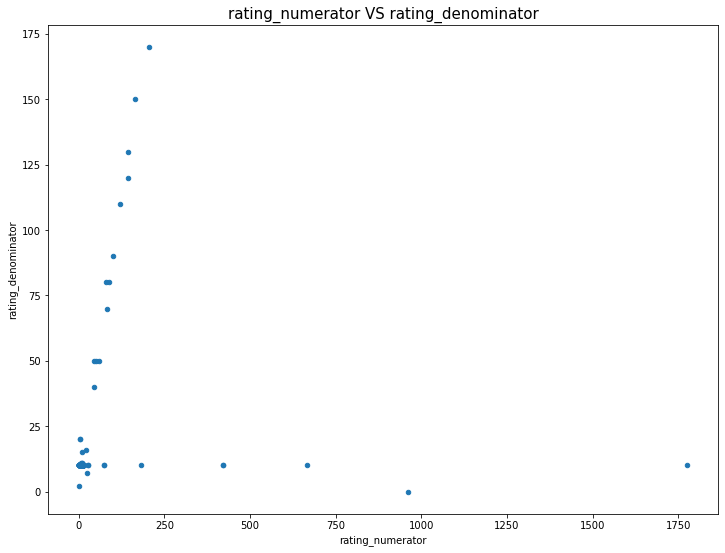

In [113]:
twitter.plot(x='rating_numerator', y='rating_denominator', kind='scatter').set_title("rating_numerator VS rating_denominator",size=15)

Text(0.5, 1.0, 'p1_conf VS p2_conf')

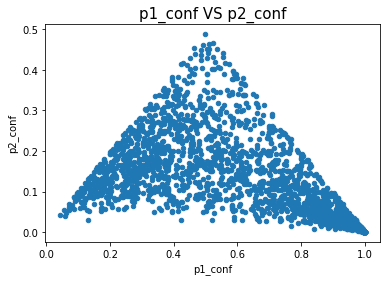

In [72]:
image_predictions.plot(x='p1_conf', y='p2_conf', kind='scatter').set_title("p1_conf VS p2_conf",size=15)

Text(0.5, 1.0, 'p2_conf VS p3_conf')

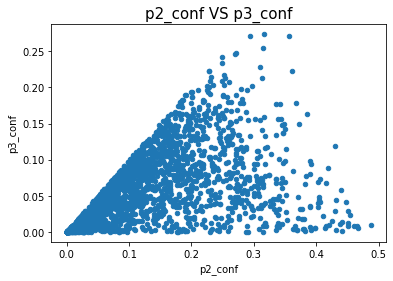

In [73]:
image_predictions.plot(x='p2_conf', y='p3_conf', kind='scatter').set_title("p2_conf VS p3_conf",size=15)

Text(0.5, 1.0, ' Dogs ')

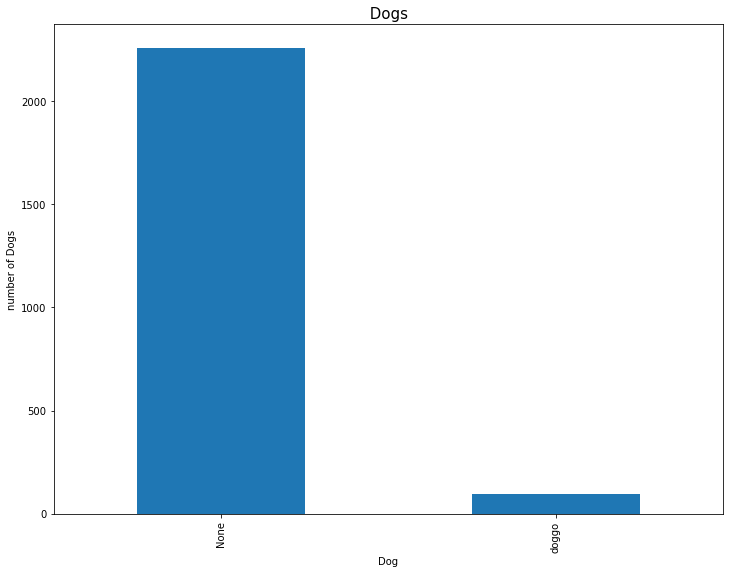

In [114]:
twitter['doggo'].value_counts()[0:6].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog')
plt.ylabel('number of Dogs')
plt.title(' Dogs ', size=15)

Text(0.5, 1.0, ' name of dogs ')

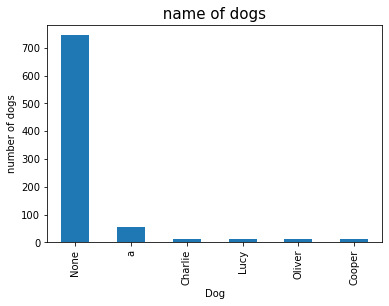

In [75]:
twitter['name'].value_counts()[0:6].sort_values(ascending=False).plot(kind ='bar')
plt.xlabel('Dog')
plt.ylabel('number of dogs')
plt.title(' name of dogs ', size=15)

Text(0.5, 1.0, 'Favorites VS Retweets')

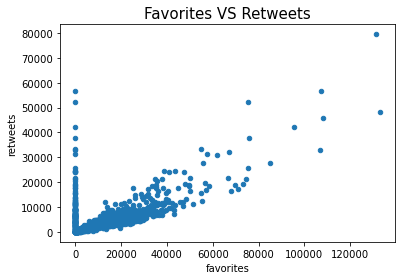

In [90]:
File_copy.plot(x='favorites', y='retweets', kind='scatter').set_title("Favorites VS Retweets",size=15)

## Summary

Download the data to be analyzed
The files that must be viewed and made commensurate with each other, because they serve one account, and they are three files that were previously explained, namely (Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv
The tweet image predictions, i.e.This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
Twitter JSON )
View the data and know its characteristics through the use of many Python programs in pandas
Find and delete duplicate data
Query for data that does not contain value
Delete data that does not contain a value
Describe data that contains individual values ​​and make use of them
Know the quality of the image data used in the image data
Delete the columns that do not lead to a cognitive value in analyzing the data or that are not useful in the analysis. Rather, it is considered an obstacle in the analysis. If there are many columns, we must focus on the columns that lead to a result in their values ​​and be used.